<a href="https://colab.research.google.com/github/kerenalli/Neural-Nets/blob/main/20210203_Keras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
77/77 [==============================] - 2s 3ms/step - loss: 26.6851 - accuracy: 0.3641
Epoch 2/150
77/77 [==============================] - 0s 3ms/step - loss: 9.3130 - accuracy: 0.5109
Epoch 3/150
77/77 [==============================] - 0s 3ms/step - loss: 3.2156 - accuracy: 0.6306
Epoch 4/150
77/77 [==============================] - 0s 3ms/step - loss: 1.6301 - accuracy: 0.6427
Epoch 5/150
77/77 [==============================] - 0s 3ms/step - loss: 1.1765 - accuracy: 0.6541
Epoch 6/150
77/77 [==============================] - 0s 3ms/step - loss: 1.0022 - accuracy: 0.6421
Epoch 7/150
77/77 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.6554
Epoch 8/150
77/77 [==============================] - 0s 3ms/step - loss: 0.8647 - accuracy: 0.6500
Epoch 9/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7947 - accuracy: 0.6691
Epoch 10/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.6918
Epoch 11

Epoch 1/400
39/39 - 1s - loss: 0.5232 - val_loss: 0.1249
Epoch 2/400
39/39 - 0s - loss: 0.2653 - val_loss: 0.1109
Epoch 3/400
39/39 - 0s - loss: 0.1441 - val_loss: 0.0965
Epoch 4/400
39/39 - 0s - loss: 0.0952 - val_loss: 0.0824
Epoch 5/400
39/39 - 0s - loss: 0.0663 - val_loss: 0.0695
Epoch 6/400
39/39 - 0s - loss: 0.0542 - val_loss: 0.0584
Epoch 7/400
39/39 - 0s - loss: 0.0459 - val_loss: 0.0494
Epoch 8/400
39/39 - 0s - loss: 0.0389 - val_loss: 0.0404
Epoch 9/400
39/39 - 0s - loss: 0.0349 - val_loss: 0.0344
Epoch 10/400
39/39 - 0s - loss: 0.0316 - val_loss: 0.0292
Epoch 11/400
39/39 - 0s - loss: 0.0298 - val_loss: 0.0252
Epoch 12/400
39/39 - 0s - loss: 0.0266 - val_loss: 0.0229
Epoch 13/400
39/39 - 0s - loss: 0.0253 - val_loss: 0.0209
Epoch 14/400
39/39 - 0s - loss: 0.0244 - val_loss: 0.0201
Epoch 15/400
39/39 - 0s - loss: 0.0235 - val_loss: 0.0188
Epoch 16/400
39/39 - 0s - loss: 0.0220 - val_loss: 0.0181
Epoch 17/400
39/39 - 0s - loss: 0.0211 - val_loss: 0.0173
Epoch 18/400
39/39 - 0s

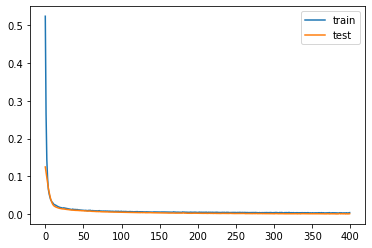

In [2]:
# train autoencoder for regression with no compression in the bottleneck layer
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [3]:
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
# define dataset
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)


0.7662337662337663


Epoch 1/200
44/44 - 2s - loss: 0.6756 - val_loss: 0.1394
Epoch 2/200
44/44 - 0s - loss: 0.2862 - val_loss: 0.1072
Epoch 3/200
44/44 - 0s - loss: 0.1440 - val_loss: 0.0824
Epoch 4/200
44/44 - 0s - loss: 0.0805 - val_loss: 0.0635
Epoch 5/200
44/44 - 0s - loss: 0.0512 - val_loss: 0.0502
Epoch 6/200
44/44 - 0s - loss: 0.0384 - val_loss: 0.0404
Epoch 7/200
44/44 - 0s - loss: 0.0326 - val_loss: 0.0346
Epoch 8/200
44/44 - 0s - loss: 0.0293 - val_loss: 0.0302
Epoch 9/200
44/44 - 0s - loss: 0.0279 - val_loss: 0.0279
Epoch 10/200
44/44 - 0s - loss: 0.0273 - val_loss: 0.0279
Epoch 11/200
44/44 - 0s - loss: 0.0248 - val_loss: 0.0262
Epoch 12/200
44/44 - 0s - loss: 0.0238 - val_loss: 0.0242
Epoch 13/200
44/44 - 0s - loss: 0.0238 - val_loss: 0.0228
Epoch 14/200
44/44 - 0s - loss: 0.0230 - val_loss: 0.0226
Epoch 15/200
44/44 - 0s - loss: 0.0224 - val_loss: 0.0221
Epoch 16/200
44/44 - 0s - loss: 0.0215 - val_loss: 0.0223
Epoch 17/200
44/44 - 0s - loss: 0.0212 - val_loss: 0.0212
Epoch 18/200
44/44 - 0s

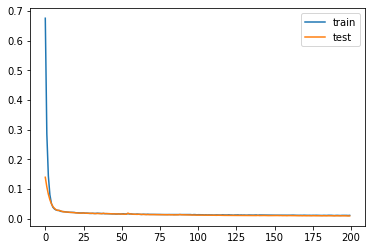

In [4]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 4
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [27]:
# evaluate logistic regression on encoded input
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from sklearn.ensemble import VotingClassifier
from sklearn import svm
# define dataset
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

model = svm.SVC()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

0.6948051948051948
0.7727272727272727
0.7617604617604619


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7617604617604619